In [ ]:
"""
- Vanilla VGG transfer learning
    - save results to cifar/models/vgg_cifar10.h5
"""

In [1]:
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline
%config Completer.use_jedi = False

2024-04-28 14:41:32.722806: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 14:41:32.749514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 14:41:33.176719: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Prepare data

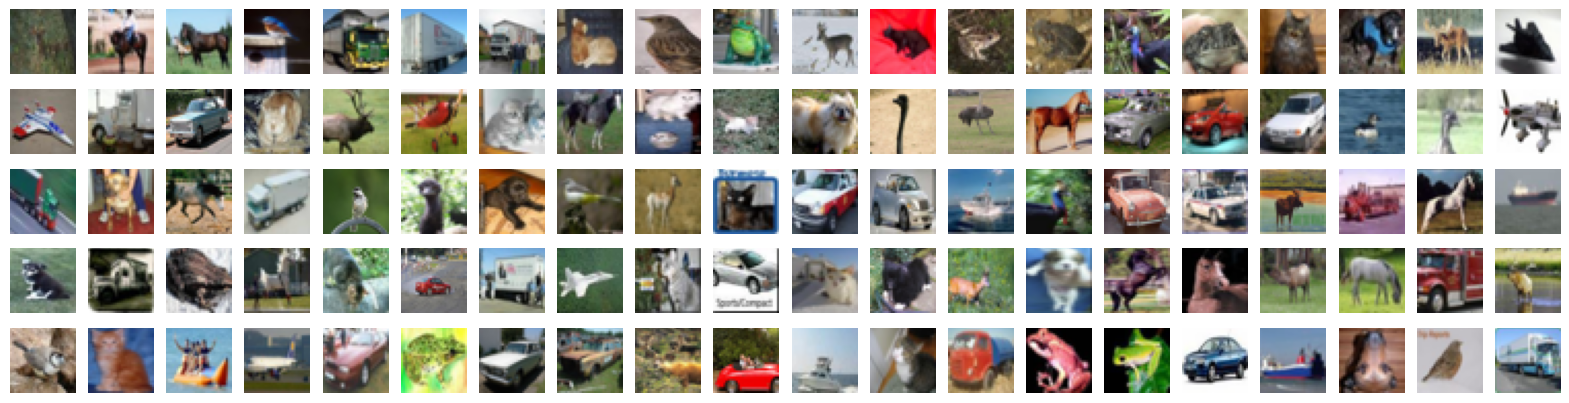

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_dataset(x_train)


num_classes = 10 

mean = np.mean(x_train,axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
# x_train = x_train/255.
y_train = utils.to_categorical(y_train, num_classes) 

# x_test = x_test/255.
y_test = utils.to_categorical(y_test, num_classes) 


# VGG19 transfer learning

In [3]:
def build_model(weight_decay= 0.0005, x_shape=[32,32,3], num_classes=10):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

learning

In [4]:
model = build_model()
model.load_weights('cifar/models/cifar10vgg.h5')

/home/x/miniconda3/envs/ml4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-28 14:41:35.962079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9461 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
for i in range(54):
    model.layers[i].trainable = False

for i in range(54,len(model.layers)):
    model.layers[i].trainable = True

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test)) # id10

Epoch 1/10


I0000 00:00:1714308098.569658   18293 service.cc:145] XLA service 0x7a1d38001700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714308098.569688   18293 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-28 14:41:38.606953: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 14:41:38.817267: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 5/98 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9974 - loss: 0.0142

I0000 00:00:1714308109.676696   18293 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - accuracy: 0.9965 - loss: 0.0171 - val_accuracy: 0.9332 - val_loss: 0.3802
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9955 - loss: 0.0234 - val_accuracy: 0.9339 - val_loss: 0.3432
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9962 - loss: 0.0220 - val_accuracy: 0.9346 - val_loss: 0.3533
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9963 - loss: 0.0229 - val_accuracy: 0.9343 - val_loss: 0.3608
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9965 - loss: 0.0222 - val_accuracy: 0.9346 - val_loss: 0.3570
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9963 - loss: 0.0224 - val_accuracy: 0.9338 - val_loss: 0.3365
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9969 - loss: 0.0220 - val_accuracy: 0.9359 - val_loss: 0.3510
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9965 - loss: 0.0239 - val_accuracy: 0.9350 - val_loss: 

In [11]:
model.save('cifar/models/vgg_cifar10.h5')

evaluate

In [12]:
model = tf.keras.models.load_model("cifar/models/vgg_cifar10.h5")

In [13]:
vgg_results = full_evaluate(model, x_test, np.argmax(y_test,1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
accuracy_score: 0.9353
f1_score_macro: 0.9352580464982643
f1_score_weighted: 0.9353419535017355
